In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import sys
import matplotlib.dates as mdates
# coding: utf-8
%matplotlib inline

In [2]:
from matplotlib.dates import DateFormatter

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
data = pd.read_csv('0328_tokyo_covid19_patients.csv',na_values=['不明'])
data.columns

Index(['No', '全国地方公共団体コード', '都道府県名', '市区町村名', '公表_年月日', '曜日', '発症_年月日',
       '患者_居住地', '患者_年代', '患者_性別', '患者_属性', '患者_状態', '患者_症状', '患者_渡航歴の有無フラグ',
       '備考', '退院済フラグ'],
      dtype='object')

In [4]:
cols = ['公表_年月日','患者_年代','患者_性別', '退院済フラグ']
# Published_date, Patient_Age, Patient_sex, Discharged flag
new_data = data[cols]
new_data.columns=['date','age','sex','discharge']
print(new_data.info())
print(new_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 4 columns):
date         362 non-null object
age          358 non-null object
sex          361 non-null object
discharge    46 non-null float64
dtypes: float64(1), object(3)
memory usage: 11.4+ KB
None
         date  age sex  discharge
0  2020-01-24  40代  男性        1.0
1  2020-01-25  30代  女性        1.0
2  2020-01-30  30代  女性        1.0
3  2020-02-13  70代  男性        NaN
4  2020-02-14  50代  女性        1.0


In [5]:
print(new_data['age'].unique())
print(len(new_data['age']))
print(new_data.groupby('age')['age'].count().sum())
print(new_data[new_data['age'].isnull()])

['40代' '30代' '70代' '50代' '80代' '60代' '20代' '10歳未満' '90代' '10代' nan]
362
358
           date  age  sex  discharge
191  2020-03-25  NaN   女性        NaN
192  2020-03-25  NaN   男性        NaN
193  2020-03-25  NaN   女性        NaN
228  2020-03-26  NaN  NaN        NaN


In [6]:
new_data.head(5)

,date,age,sex,discharge
0,2020-01-24,40代,男性,1.0
1,2020-01-25,30代,女性,1.0
2,2020-01-30,30代,女性,1.0
3,2020-02-13,70代,男性,NaN
4,2020-02-14,50代,女性,1.0


In [7]:
new_data["sex"] = (new_data["sex"]
                          .str.replace("男性","M")
                          .str.replace("女性","F")
                          )
new_data["age"] = (new_data["age"]
                          .str.replace("10歳未満","0")  # "10歳未満" means younger than 10years old. I changed it to 0.   
                          )
new_data["age"] = (new_data["age"]
                          .str.replace("代","")
                          )


f:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
f:\program files\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
f:\program files\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [8]:
new_data.head()

,date,age,sex,discharge
0,2020-01-24,40,M,1.0
1,2020-01-25,30,F,1.0
2,2020-01-30,30,F,1.0
3,2020-02-13,70,M,NaN
4,2020-02-14,50,F,1.0


In [9]:
print(new_data['age'].unique())
print(new_data['sex'].unique())
print(new_data['discharge'].unique())
print(new_data['date'].unique())

print(len(new_data[new_data['age'].isnull()]))
print(len(new_data[new_data['sex'].isnull()]))
print(len(new_data[new_data['discharge'].isnull()]))

['40' '30' '70' '50' '80' '60' '20' '0' '90' '10' nan]
['M' 'F' nan]
[ 1. nan]
['2020-01-24' '2020-01-25' '2020-01-30' '2020-02-13' '2020-02-14'
 '2020-02-15' '2020-02-16' '2020-02-18' '2020-02-19' '2020-02-21'
 '2020-02-22' '2020-02-24' '2020-02-26' '2020-02-27' '2020-02-29'
 '2020-03-01' '2020-03-03' '2020-03-04' '2020-03-05' '2020-03-06'
 '2020-03-07' '2020-03-10' '2020-03-11' '2020-03-12' '2020-03-13'
 '2020-03-14' '2020-03-15' '2020-03-17' '2020-03-18' '2020-03-19'
 '2020-03-20' '2020-03-21' '2020-03-22' '2020-03-23' '2020-03-24'
 '2020-03-25' '2020-03-26' '2020-03-27' '2020-03-28']
4
1
316


In [10]:
new_data1 = new_data.copy()
print(new_data1.head())
new_data1.fillna(0)

         date age sex  discharge
0  2020-01-24  40   M        1.0
1  2020-01-25  30   F        1.0
2  2020-01-30  30   F        1.0
3  2020-02-13  70   M        NaN
4  2020-02-14  50   F        1.0


,date,age,sex,discharge
0,2020-01-24,40,M,1.0
1,2020-01-25,30,F,1.0
2,2020-01-30,30,F,1.0
3,2020-02-13,70,M,0.0
4,2020-02-14,50,F,1.0
...,...,...,...,...
357,2020-03-28,30,F,0.0
358,2020-03-28,60,M,0.0
359,2020-03-28,50,M,0.0
360,2020-03-28,50,M,0.0


In [11]:
new_data = new_data.set_index('date')
#moved the 'DATE' column into the index

new_data.index = pd.to_datetime(new_data.index)
#convert the string 'DATE' column to a datetime dtype
print(new_data.head())


           age sex  discharge
date                         
2020-01-24  40   M        1.0
2020-01-25  30   F        1.0
2020-01-30  30   F        1.0
2020-02-13  70   M        NaN
2020-02-14  50   F        1.0


In [16]:
pv = new_data.pivot_table(values ='sex',index = ['date'], columns = ['age'], aggfunc = len, fill_value=0 )
print(pv.head())
print(len(pv.index))


age         0  10  20  30  40  50  60  70  80  90
date                                             
2020-01-24  0   0   0   0   1   0   0   0   0   0
2020-01-25  0   0   0   1   0   0   0   0   0   0
2020-01-30  0   0   0   1   0   0   0   0   0   0
2020-02-13  0   0   0   0   0   0   0   1   0   0
2020-02-14  0   0   0   0   0   1   0   1   0   0
39


age         0  10  20  30  40  50  60  70  80  90
date                                             
2020-01-24  0   0   0   0   1   0   0   0   0   0
2020-01-25  0   0   0   1   0   0   0   0   0   0
2020-01-30  0   0   0   1   0   0   0   0   0   0
2020-02-13  0   0   0   0   0   0   0   1   0   0
2020-02-14  0   0   0   0   0   1   0   1   0   0
2020-02-15  0   0   0   0   2   2   1   2   1   0
2020-02-16  0   0   0   2   0   0   3   0   0   0
2020-02-18  0   0   1   0   0   1   0   0   1   0
2020-02-19  0   0   0   0   0   0   0   3   0   0
2020-02-21  0   0   0   0   0   2   0   1   0   0
2020-02-22  0   0   0   0   0   0   1   0   0   0
2020-02-24  0   0   0   1   1   1   0   0   0   0
2020-02-26  0   0   0   0   0   0   0   2   1   0
2020-02-27  0   0   0   0   0   0   1   0   0   0
2020-02-29  0   0   1   0   0   0   0   0   0   0
2020-03-01  0   0   0   0   0   1   0   1   0   0
2020-03-03  0   0   0   0   0   1   0   0   0   0
2020-03-04  0   0   0   1   1   1   0   0   1   0


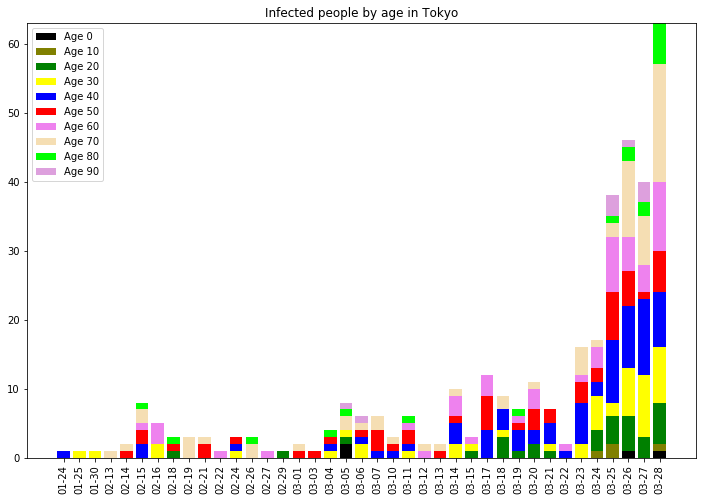

In [17]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))
pv = new_data.pivot_table(values ='sex',index = ['date'], columns = ['age'], aggfunc = len, fill_value=0)
print(pv)
pv.index = pv.index.strftime('%m-%d')
ax.bar(pv.index.values,   pv['0'] , color='black', label="Age 0")
ax.bar(pv.index.values,   pv['10'] , bottom=pv['0'], color='olive', label="Age 10")
ax.bar(pv.index.values,   pv['20'] , bottom=pv['10']+pv['0'], color='green', label="Age 20")
ax.bar(pv.index.values,   pv['30'] , bottom=pv['20']+pv['10']+pv['0'], color='yellow', label="Age 30")
ax.bar(pv.index.values,   pv['40'] , bottom=pv['30']+pv['20']+pv['10']+pv['0'], color='blue', label="Age 40")
ax.bar(pv.index.values,   pv['50'] , bottom=pv['40']+pv['30']+pv['20']+pv['10']+pv['0'], color='red', label="Age 50")
ax.bar(pv.index.values,   pv['60'] , bottom=pv['50']+pv['40']+pv['30']+pv['20']+pv['10']+pv['0'], color='violet', label="Age 60")
ax.bar(pv.index.values,   pv['70'] , bottom=pv['60']+pv['50']+pv['40']+pv['30']+pv['20']+pv['10']+pv['0'], color='wheat', label="Age 70")
ax.bar(pv.index.values,   pv['80'] , bottom=pv['70']+pv['60']+pv['50']+pv['40']+pv['30']+pv['20']+pv['10']+pv['0'], color='lime', label="Age 80")
ax.bar(pv.index.values,   pv['90'] , bottom=pv['80']+pv['70']+pv['60']+pv['50']+pv['40']+pv['30']+pv['20']+pv['10']+pv['0'], color='plum', label="Age 90")


ax.legend(loc='upper left')
ax.set_title('Infected people by age in Tokyo', fontsize=12)
plt.xticks(rotation=90)
plt.show()

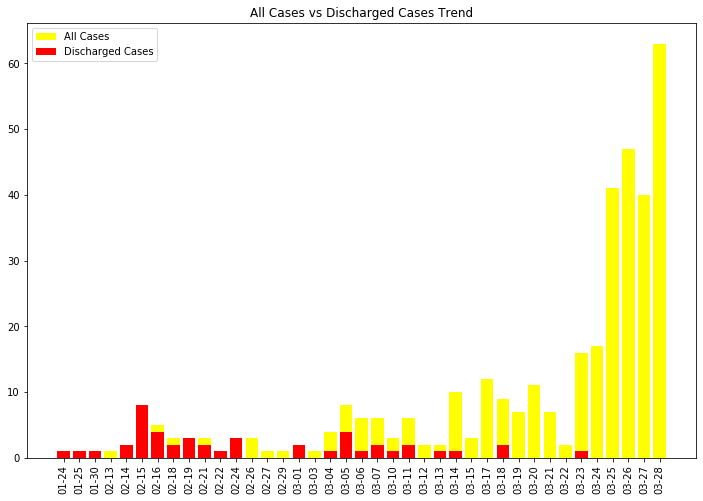

In [18]:
all_cases_df = pd.DataFrame(new_data1['date'].value_counts())
all_cases_df.reset_index(inplace=True)
all_cases_df['new_date'] = pd.to_datetime(all_cases_df['index'])
all_cases_df.drop(['index'], axis=1, inplace=True)
all_cases_df.rename(columns={"date":"Total_Cases"}, inplace=True)
all_cases_df.sort_values('new_date', inplace=True)
all_cases_df.index = all_cases_df.new_date
all_cases_df.drop('new_date', axis=1, inplace=True)

discharge_df = pd.DataFrame(new_data1.groupby('date')['discharge'].sum())
discharge_df.reset_index(inplace=True)
discharge_df['new_date'] = pd.to_datetime(discharge_df['date'])
discharge_df.drop(['date'], axis=1, inplace=True)
discharge_df.rename(columns={"discharge":"Discharged_Cases", "new_date":"Date"}, inplace=True)
discharge_df.index = discharge_df.Date
discharge_df.drop(['Date'], axis=1, inplace=True)

#Plotting Code
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))

# Add x-axis and y-axis
all_cases_df.index = all_cases_df.index.strftime('%m-%d')
discharge_df.index = discharge_df.index.strftime('%m-%d')


ax.bar(all_cases_df.index.values, all_cases_df.Total_Cases, color='Yellow', label="All Cases", alpha=1)
ax.bar(discharge_df.index.values, discharge_df.Discharged_Cases, color='Red', label="Discharged Cases", alpha=1)

ax.legend(loc='upper left')
ax.set_title('All Cases vs Discharged Cases Trend', fontsize=12)


plt.xticks(rotation=90)

plt.show()


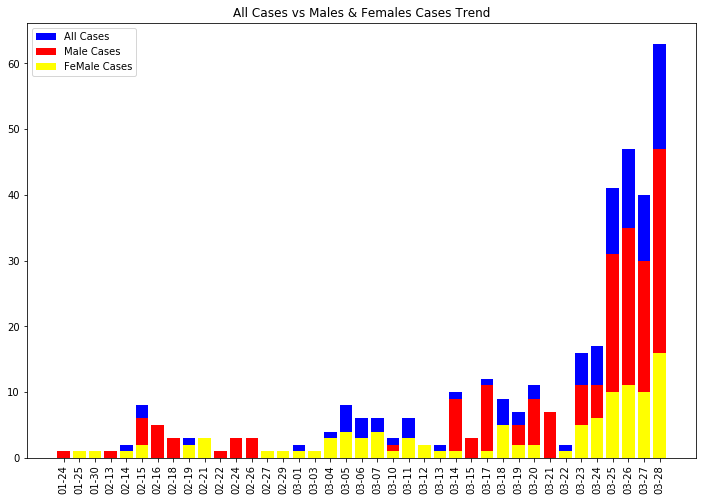

In [19]:
all_cases_df = pd.DataFrame(new_data1['date'].value_counts())
all_cases_df.reset_index(inplace=True)
all_cases_df['new_date'] = pd.to_datetime(all_cases_df['index'])
all_cases_df.drop(['index'], axis=1, inplace=True)
all_cases_df.rename(columns={"date":"Total_Cases"}, inplace=True)
all_cases_df.sort_values('new_date', inplace=True)
all_cases_df.index = all_cases_df.new_date
all_cases_df.drop('new_date', axis=1, inplace=True)

test = pd.DataFrame(new_data1.groupby(['date','sex'])['sex'].count())
test.rename(columns={"sex":"Cases"}, inplace=True)
test.reset_index(inplace=True)
test['date'] = pd.to_datetime(test['date'])
test.index = test.date
test["Male_Count"] = np.select([test.sex == 'M'], [test.Cases], default=0)
test["FeMale_Count"] = np.select([test.sex == 'F'], [test.Cases], default=0)

#Plotting Code
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))

all_cases_df.index = all_cases_df.index.strftime('%m-%d')
test.index = test.index.strftime('%m-%d')

# Add x-axis and y-axis
ax.bar(all_cases_df.index.values, all_cases_df.Total_Cases, color='Blue', label="All Cases", alpha=1)
ax.bar(test.index.values, test['Male_Count'], color='Red', label="Male Cases", alpha=1)
ax.bar(test.index.values, test['FeMale_Count'], color='Yellow', label="FeMale Cases", alpha=1)

ax.legend(loc='upper left')
ax.set_title('All Cases vs Males & Females Cases Trend', fontsize=12)
plt.xticks(rotation=90)

plt.show()

